# 의사결정나무 - 분류 
### I. [타이타닉 데이터 이용하기](https://www.kaggle.com/c/titanic)
- kaggle에서 데이터설명 참조

### II. Variable Notes:

[pclass]: A proxy for socio-economic status (SES)
1. 1st = Upper
1. 2nd = Middle
1. 3rd = Lower

[age]: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

[sibsp]: #siblings/spouses aboard the Titanic - the dataset defines family relations in this way

1. Sibling = brother, sister, stepbrother, stepsister
1. Spouse = husband, wife 

[parch]: #parents/children aboard the Titanic - the dataset defines family relations in this way.

1. Parent = mother, father
1. Child = daughter, son, stepdaughter, stepson
1. Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd

#데이터 불러오기
data = pd.read_csv('titanic.csv')
data = data.loc[:,('Survived','Pclass','Sex','Age','SibSp','Parch','Fare')]

In [2]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [3]:
data.dropna(inplace=True) #missing value 제거, inplace=True: 데이터에 반영
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708
10,1,3,female,4.0,1,1,16.7000


In [4]:
#성별 data를 범주형으로 변환

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex) #female:0, male:1

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [6]:
X = data.iloc[:,1:] #독립변수: 2열~마지막 열까지
y = data.iloc[:,0]  #종속변수: 1열

In [7]:
X.shape, y.shape

((714, 6), (714,))

In [8]:
#전체 데이터를 학습과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split

#X(입력변수)와 y(종속변수)로 이루어진 데이터를 학습과 테스트 데이터넷으로 각각 70%, 30%의 비율로 나눔
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y) 

In [9]:
#분류나무(Classification Tree)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  #Training accuracy
y_test_pred = dtc.predict(X_test)    #Test accuracy

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9879759519038076
0.7069767441860465


In [11]:
# 혼합행렬을 시각화 한 모습 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusionmatrix(y_train_pred,y_train,dom,classes):
    print(f'---{dom} Confusion matrix---')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9879759519038076
Test score 0.7069767441860465
---Train Confusion matrix---


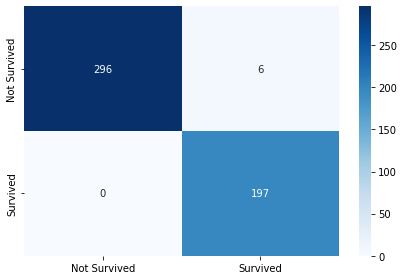

---Test Confusion matrix---


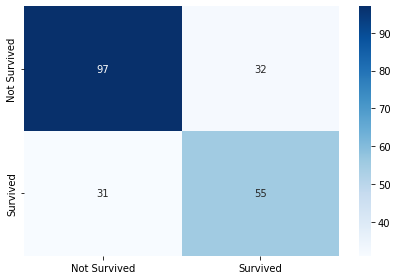

In [12]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
classes = ['Not Survived','Survived']
plot_confusionmatrix(y_train_pred,y_train,'Train',classes)
plot_confusionmatrix(y_test_pred,y_test,'Test',classes)     # 예측 데이터에 대한 값이 너무 낮음 즉, 오버피팅이 늘어남

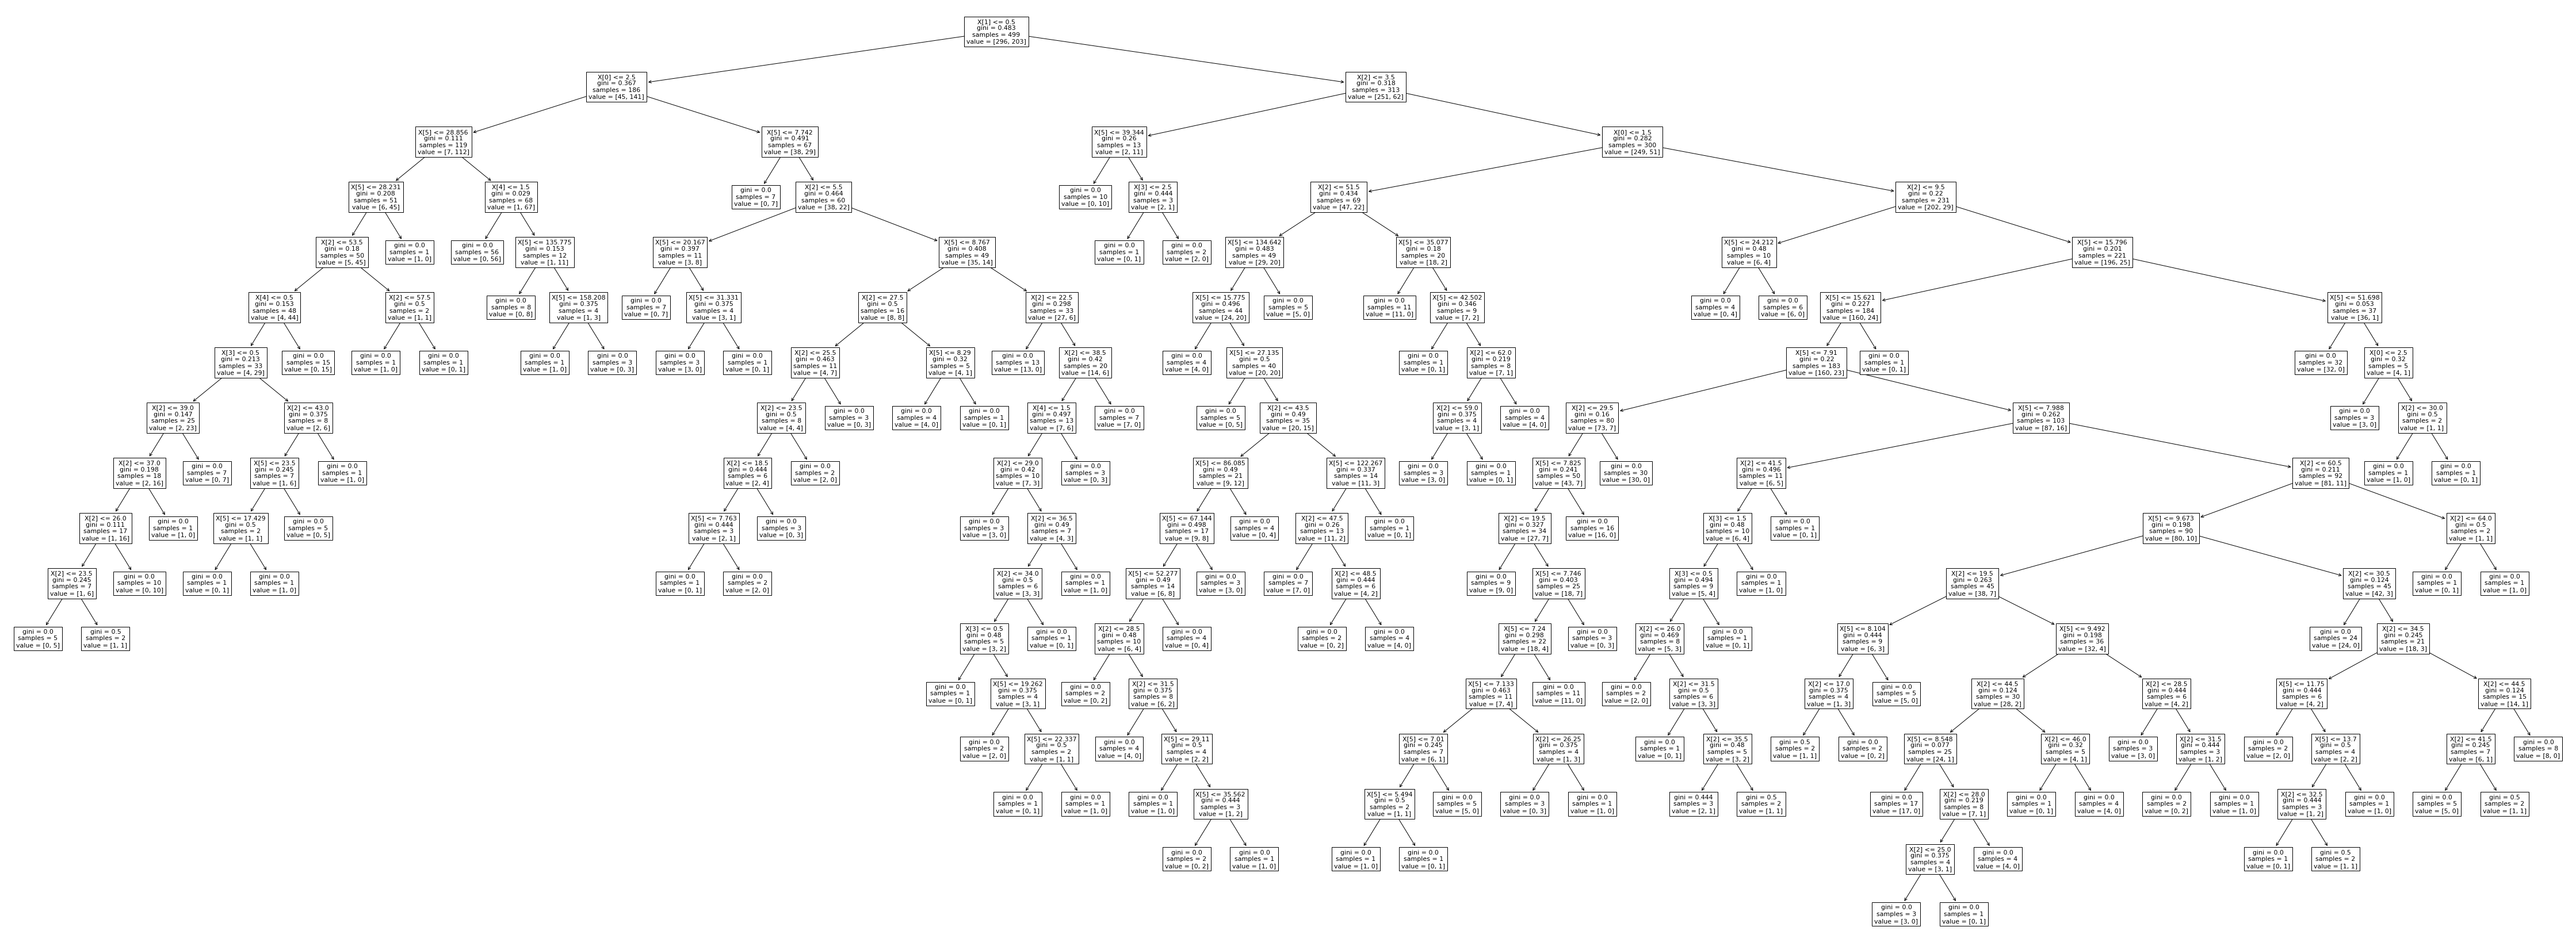

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(80, 30))
plot_tree(dtc.fit(X_train, y_train), fontsize=11)
plt.savefig('tree_high_dpi', dpi=200)

# Gini vs Entropy

In [14]:
#지니계수 사용
dtc = DecisionTreeClassifier(criterion='gini', random_state=1)
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
print(f'Criterion: gini, accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

#엔트로피 사용
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1)
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
print(f'Criterion: entropy, accuracy: {accuracy_score(y_test, y_test_pred):.3f}')

Criterion: gini, accuracy: 0.707
Criterion: entropy, accuracy: 0.716


# 과적합 방지 - Stop Condition 
- criterion, max_depth tuning해보기

In [15]:
def dtc_tuning(criterion, max_depth):

    pred_result = []
    for d in range(1,max_depth):
        dtc = DecisionTreeClassifier(criterion=criterion, max_depth=d, random_state=1)
        dtc.fit(X_train, y_train)
        y_test_pred = dtc.predict(X_test)
        pred_result.append(accuracy_score(y_test, y_test_pred))

    return pred_result

max_depth = 30
gini_acc = dtc_tuning('gini', max_depth)
entropy_acc = dtc_tuning('entropy', max_depth)

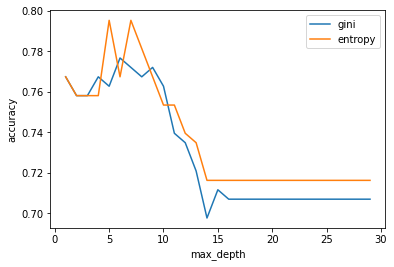

In [16]:
#criterion, max_depth에 따른 정확도 시각화
plt.plot(range(1,max_depth), gini_acc, label='gini')
plt.plot(range(1,max_depth), entropy_acc, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [17]:
#정확도가 가장 높을 때의 tree depth (criterion:'entorpy')
depth = entropy_acc.index(max(entropy_acc)) + 1  

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1)      #앤트로피로 바꿔보고 깊이도 엔트로피의 가장 좋게 분류해난 값을 기준으로 깊이를 함.
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7953488372093023

Train score 0.9879759519038076
Test score 0.7953488372093023
---Train Confusion matrix---


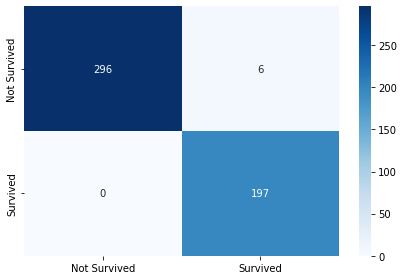

---Test Confusion matrix---


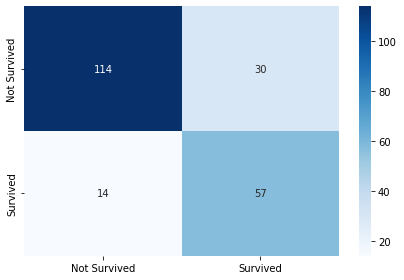

In [18]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
classes = ['Not Survived','Survived']
plot_confusionmatrix(y_train_pred,y_train,'Train',classes)
plot_confusionmatrix(y_test_pred,y_test,'Test',classes)

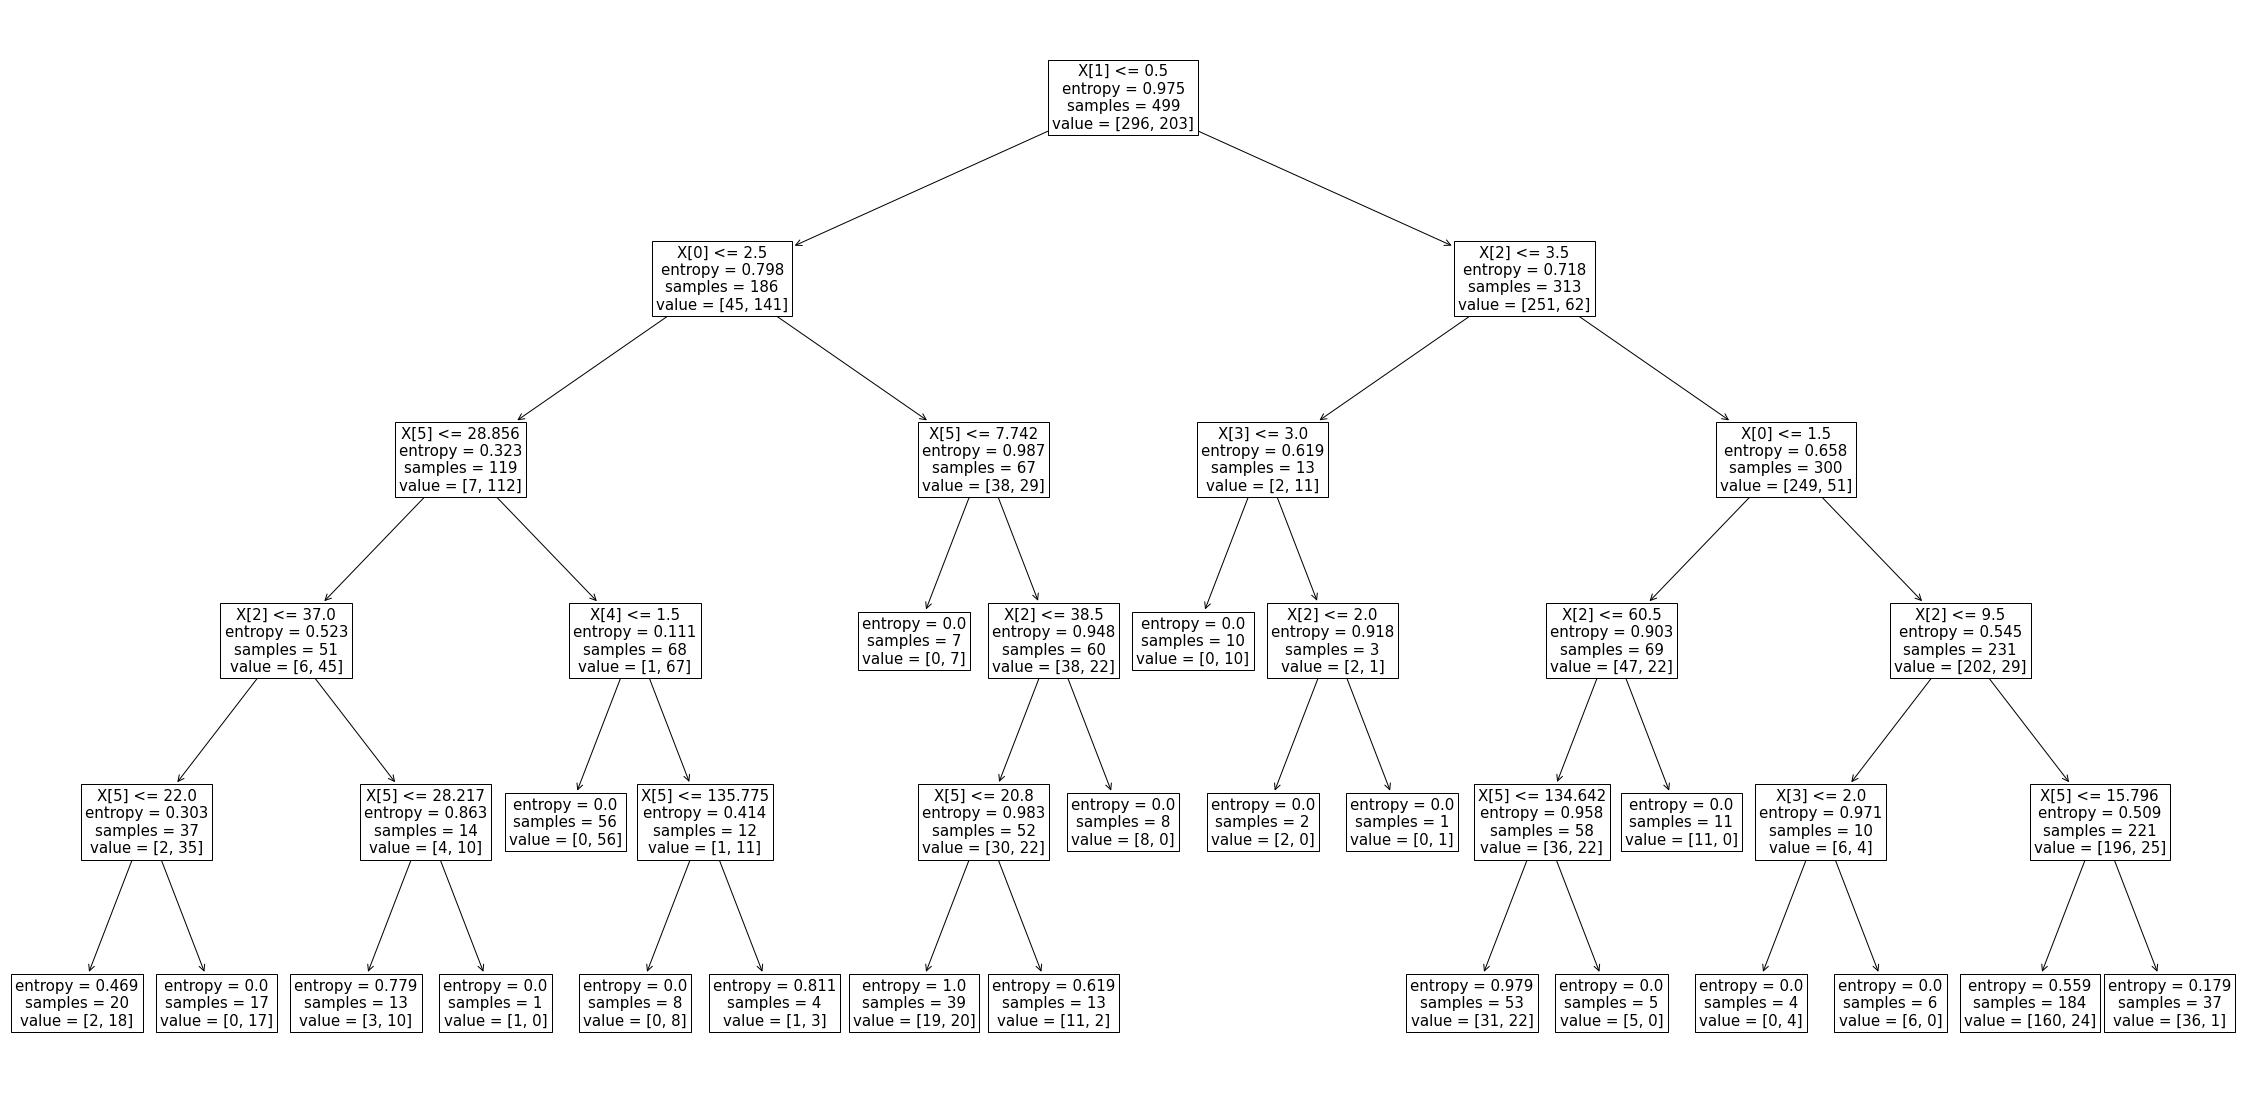

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40, 20))
plot_tree(dtc.fit(X_train, y_train), fontsize=15)
plt.savefig('tree_high_dpi', dpi=100)

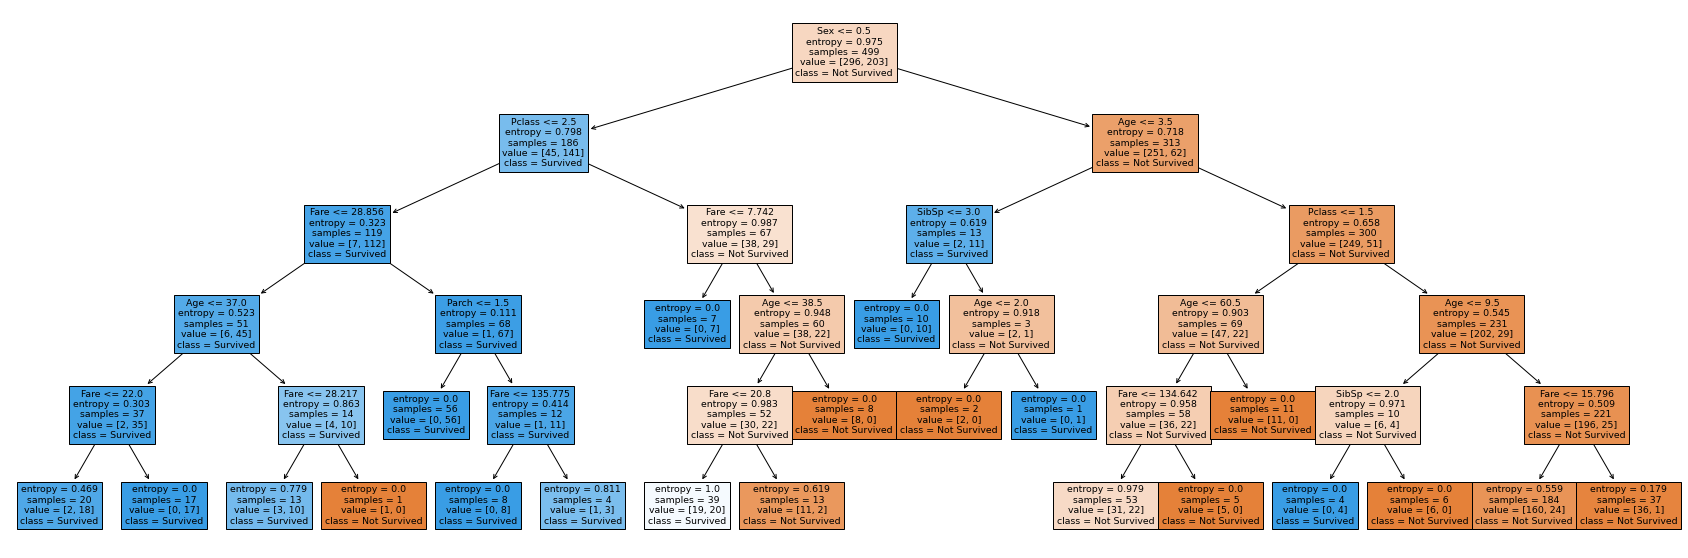

In [20]:
plt.figure(figsize=(30,10))
features = data.columns[1:]
classes = ['Not Survived','Survived']
plot_tree(dtc,feature_names=features,class_names=classes,filled=True)
plt.show()

In [24]:
# import numpy as np
# importances = pd.DataFrame({"feature":features, "importances":np.round(dtc.feature_importances_, 3)})
# importances = importances.sort_values("importance", ascending=False)
# importances

KeyError: 'importance'

실수형 변형, cloun 종속변수 어떠한 기계학습 가능. 정확도 70 이상 